<center><font face="Times New ROman" size="10" color="#000080">- NA52 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- SEM O SONICO -</font>

In [1]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

In [2]:
#--------------------------Armazenando os Dados-------------------------------#

data  = np.fromfile('NA52D.dat', dtype=float, count=-1, sep='	')

p  = len(data)/6 

print len(data),'- comprimento original, antes da divisao'
print p,'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/6,6))

7878 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna


In [3]:
#--------------------------As propriedades petrofisicas do poco-------------------------------#

prof = data[:,0] # profundidade em metros
DTP  = data[:,1] # DTp em us/ft
GR   = data[:,2] # GR em unidades API
ILD  = data[:,3] # ILD em Ohm.m
PHIN = data[:,4] # PHIN em %
RHOb = data[:,5] # RHOb em g/cm3

print prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]

2950.0556 -999.0 123.4688 1.2722 31.0204 2.4191


/home/mita/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-999.0, right=-999.0
  'left=%s, right=%s') % (left, right))


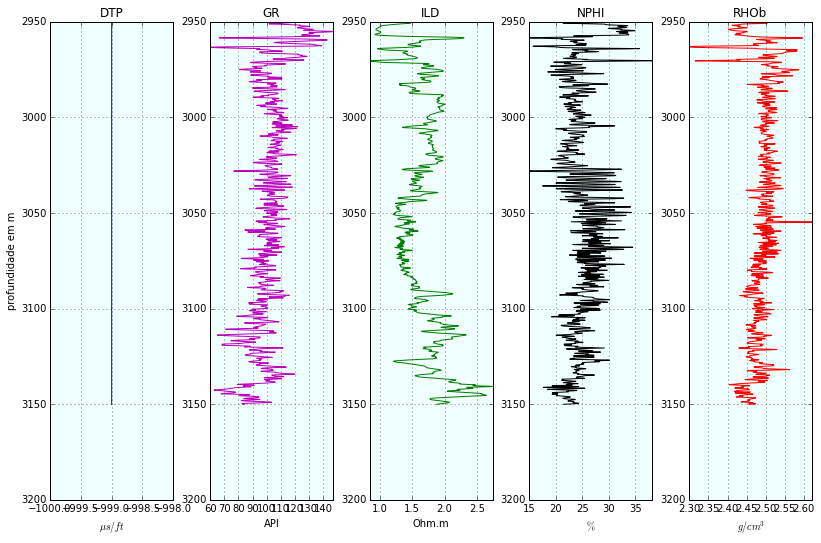

In [4]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')   

ax2.plot(DTP,prof,'-b',linewidth = 1) # repare que está DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('DTP')     # aqui o titulo 
ax2.set_xlabel('$\mu s/ft$')        # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')   # aqui o que representa o eixo y

plt.gca().invert_yaxis()              # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(DTP),xmin=min(DTP)) # aqui determinamos o valor maximo e minimo de DTP como limites do grafico
plt.grid()                            # adicionamos o grid    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(GR),xmin=min(GR))
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(ILD),xmin=min(ILD))
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

In [5]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

88 posicao do GR min | 59.7891 valor do GR min
34 posicao do GR min | 146.8437 valor do GR max

0.475840921987  media (IGR) - indice de raio gama
0.217149719332  media (VSH) - quantidade de folhelho 


In [6]:
#-------------------------------Porosidade Total-----------------------------------#

RHOf  = 1.101 # g/cm3 para a agua salgada
DTPf = 189.0 # us/feet para agua salgada

RHOma  = 2.65 # g/cm3 para o quartzo
DTPma = 55.5 # us/feet para o quartzo

print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
print DTPma,'dtma da matriz |',DTPf,'DTPf do filtrado de lama'

#-----------------------------------------------------------

PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma)/(RHOf - RHOma))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'


PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %'

#-------------------------------------------------------------------------------------------

for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'

2.65 RHOma da matriz  | 1.101 RHOf do filtrado de lama
55.5 dtma da matriz | 189.0 DTPf do filtrado de lama

10.3391078046  media (PHItd) - porosidade total pelo perfil densidade em %

14.6355565518  media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %
92  ponto de folhelho (Psh)

2.4781 densidade do folhelho (RHOsh)


In [7]:
#-------------------------------Porosidade Efetiva-----------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh - RHOma)/(RHOf - RHOma)))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva'

7.92929264946  media (PHIe) -  porosidade efetiva


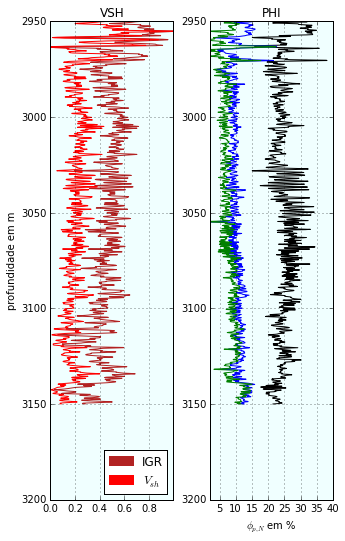

In [8]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(IGR,prof,'-',linewidth = 1,color='#B22222')
ax8.plot(VSH,prof,'-',linewidth = 1,color='red')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('VSH')
ax8.set_xlabel(' ')
ax8.set_ylabel('profundidade em m')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(VSH),xmin=min(VSH))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(PHIN,prof,'-k',linewidth = 1)
ax9.plot(PHItd,prof,'-b',linewidth = 1)
ax9.plot(PHIe,prof,'-g',linewidth = 1)
ax9.set_title('PHI')
ax9.set_xlabel('$\phi _{p,N}$ em %')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=40,xmin=2)
plt.grid()

plt.gca().invert_yaxis()


plt.show()

In [9]:
#-----------------------------------------Sonico Estimado-------------------------------------------
PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar

DTPs = []

for i in range (p):
    
    DTPs.append(DTPma + (DTPf - DTPma)*((PHItd[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)
    
#---------------------------------------------------------------------------------------------------
print mean(DTPs)

76.46062439


In [10]:
#---------------------Impedancia---(transformado de pe pra m)----------------------------
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

t0 = 2497.50 #tempo inicial em ms #

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTPs[i]))


z_imp = [] # Impedancia acustica
for i in range (p):
    z_imp0 = (RHOsi[i]*VP[i]) # de olho no RHOsi e RHOb
    z_imp.append(z_imp0)

'''
DL = prof[3]-prof[2]# valor do intervalo em m

VRMS    = [0]*p
VRMS[0] = VP[0]

# velocidade VRMS

sssp = np.array([0.00]*p)
sssq = np.array([0.00]*p)
sssh = np.array([0.00]*p)

for i in range (p):
    sssp[i] = (DL)*(VP[i])
    sssq[i] = (DL)/(VP[i])
    sssh[i] = (DL)

for i in range (1,p):
    sssp[i] = sssp[i-1] + (DL)*(VP[i])
    sssq[i] = sssq[i-1] + (DL)/(VP[i])
    sssh[i] = sssh[i-1] + (DL)
    
for i in range (p):
    VRMS[i] = np.sqrt(sssp[i]/sssq[i])
VRMS[0] = VP[0]
#------------------------------------------#
VMED    = [0]*p

for i in range (p):
    VMED[i] = sssh[i]/sssq[i]

VMED[0] = VP[0]
np.sqrt(sssp/sssq)

    
#-----------------------------------------------------
'''
R=[]
for i in range (p):
    if i == 0:
        RR = 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
    R.append(RR)
    
zero_bar = [0]*p
print min(VP)

2891.81688234


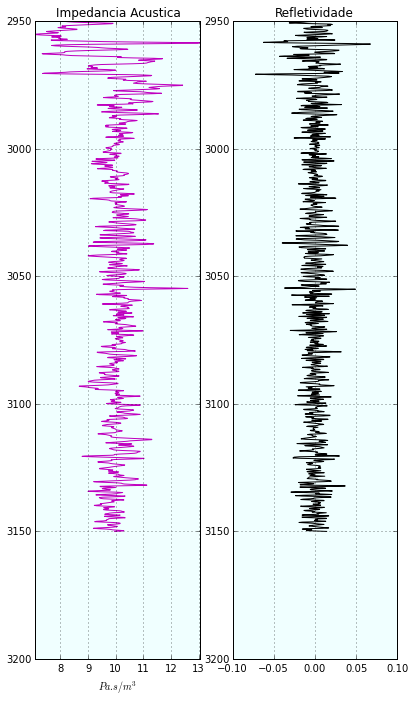

In [11]:
#---------------------Graficos 3-------------------------------

fig = plt.figure(figsize= (20,80))
fig.subplots_adjust(left=0.1, wspace=0.2)

#----------------------------------------------------------
ax21 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')

ax21.plot(z_imp,prof,'-m',linewidth = 1)

ax21.set_title('Impedancia Acustica')
ax21.set_xlabel('$ Pa.s / m^3 $')

plt.xlim(xmax=max(z_imp),xmin=min(z_imp))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax22 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')

ax22.plot(R,prof,'-k',linewidth = 1)

ax22.set_title('Refletividade')
ax22.set_xlabel(' ')

plt.xlim(xmax=0.10,xmin=-0.10)
plt.grid()

plt.gca().invert_yaxis()


plt.show()

In [13]:
X = [354904]*p
Y = [7515826]*p

filef = np.array([[-999.000]*5]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof # arquivo geral
filef[:,3] = z_imp # arquivo geral
filef[:,4] = R # arquivo geral

np.savetxt('na52-mar.dat', filef, delimiter='	', fmt='%.4f')